### Author: Zach Hughes - zhughes@tamu.edu
### Date: Mar.27.2024

In [32]:
import serpentTools
import numpy as np
import matplotlib.pyplot as plt

#coupledDet = serpentTools.readDataFile('./coupled/coupledMain_det0.m')
notCoupledDet = serpentTools.read('./notCoupled/settings_det0.m')
print(notCoupledDet.detectors)
notActiveCoreNRG = notCoupledDet.detectors['hexPowerBoth']
notActiveCoreHex = notCoupledDet.detectors['hexPlot']


{'hexPowerBoth': <serpentTools.detectors.HexagonalDetector object at 0x745559e439a0>, 'hexPlot': <serpentTools.detectors.HexagonalDetector object at 0x745559d871f0>, 'compareFuelFlux': <serpentTools.detectors.HexagonalDetector object at 0x745559d96080>, 'radialWallFlux': <serpentTools.detectors.Detector object at 0x745559d95ea0>, 'topFlux': <serpentTools.detectors.Detector object at 0x745559d95930>, 'botFlux': <serpentTools.detectors.Detector object at 0x745559d964a0>, 'radialWallInCurrent': <serpentTools.detectors.Detector object at 0x745559d953f0>, 'topInCurrent': <serpentTools.detectors.Detector object at 0x745559c3ffa0>, 'botInCurrent': <serpentTools.detectors.Detector object at 0x745559c3e950>, 'radialWallOutCurrent': <serpentTools.detectors.Detector object at 0x745559c3ee60>, 'topOutCurrent': <serpentTools.detectors.Detector object at 0x745559c3f940>, 'botOutCurrent': <serpentTools.detectors.Detector object at 0x745559c3f700>}


### now finding power per assembly

In [33]:
indexDict = {'a23':[0,5,6],
             'a22':[0,5,7],
             'a15':[0,4,8],
             'a16':[0,4,7],
             'a17':[0,4,6],
             'a18':[0,4,5] 
             }

sumPower = 0
for a in indexDict:
    i1,i2,i3 = indexDict[a][0],indexDict[a][1],indexDict[a][2]
    aPower = notActiveCoreHex.tallies[i1,i2,i3]
    sumPower += aPower*1e-6
    print(f'Assembly {a} power = {aPower*1e-6:0.3f} MW')

print(f'   Max-to-average power = {aPower/27.0707e6:0.4f}') #this is a18/knownAvgPower
print(f'total 6 power = {sumPower:0.4f} MW')

Assembly a23 power = 28.731 MW
Assembly a22 power = 25.654 MW
Assembly a15 power = 22.173 MW
Assembly a16 power = 27.928 MW
Assembly a17 power = 30.857 MW
Assembly a18 power = 31.993 MW
   Max-to-average power = 1.1818
total 6 power = 167.3357 MW


('reaction', 'ycoord', 'xcoord')


Text(0.5, 1.0, 'Active Core Assembly Power')

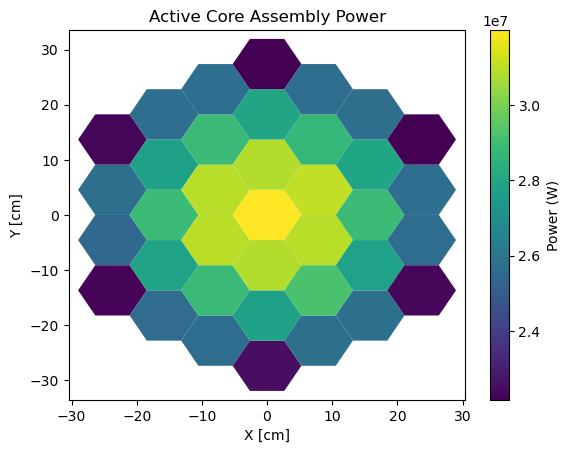

In [34]:
notActiveCoreHex.pitch = 9.131
notActiveCoreHex.hexType = 3
print(notActiveCoreHex.indexes)
# notActiveCoreHex.tallies[0,4,5] = 0
notActiveCoreHex.hexPlot(fixed={'reaction':0},
                         thresh = 1e2,cbarLabel='Power (W)')
plt.title('Active Core Assembly Power')

### Now finding axial power distribution & in-assembly peaking factors for each assembly

Assembly a23 in-assembly power peaking factor = 1.5069
Assembly a22 in-assembly power peaking factor = 1.5191
Assembly a15 in-assembly power peaking factor = 1.5143
Assembly a16 in-assembly power peaking factor = 1.5171
Assembly a17 in-assembly power peaking factor = 1.5222
Assembly a18 in-assembly power peaking factor = 1.5378
is wrong?**   Average in-assembly power peaking factor = 1.5195585293366156


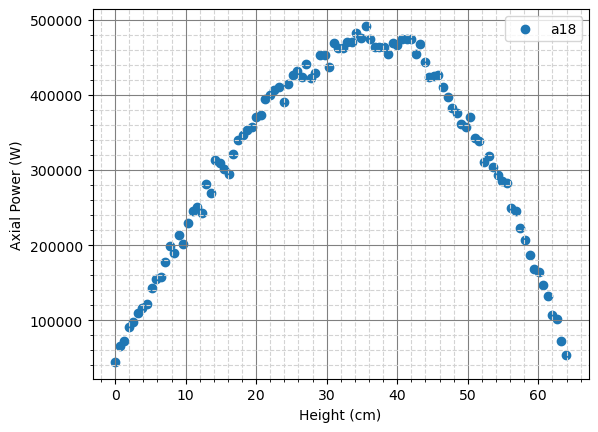

In [35]:
# print(notActiveCoreNRG.indexes)
# print(notActiveCoreNRG.tallies.shape)

# print(notActiveCoreNRG.tallies[0,:,0,0])
# print(notActiveCoreNRG.slice({'reaction':0,'zmesh':0}).shape)

axialAssemblyPowerDict = {}
assemblyPowerPeakingFactorDict = {}
for a in indexDict:
    
    i1,i2,i3 = indexDict[a][0],indexDict[a][1],indexDict[a][2]
    axialAssemblyPowerDict[a] = notActiveCoreNRG.tallies[i1,:,i2,i3]

    ppf = np.max(axialAssemblyPowerDict[a]) / np.mean(axialAssemblyPowerDict[a])
    assemblyPowerPeakingFactorDict[a] = ppf
    print(f'Assembly {a} in-assembly power peaking factor = {ppf:0.4f}')

    #plt.scatter(np.linspace(0,63.92,100),axialAssemblyPowerDict[a],label=f'{a}') # uncomment this to plot all on same plot
print(f'is wrong?**   Average in-assembly power peaking factor = {np.array(list(assemblyPowerPeakingFactorDict.values())).mean()}')
# the above is wrong, because it has not been weighted by the number of each type of assembly


# plt.title('Axial Assembly Power')
plt.scatter(np.linspace(0,63.92,100),axialAssemblyPowerDict['a18'],label='a18')
plt.ylabel('Axial Power (W)')
plt.xlabel('Height (cm)')
plt.grid(which='major', color='gray', linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', color='lightgray', linestyle='--')
plt.legend()

# print(f'blah {np.mean(axialAssemblyPowerDict["a16"])}')

('energy', 'zmesh', 'ycoord', 'xcoord')


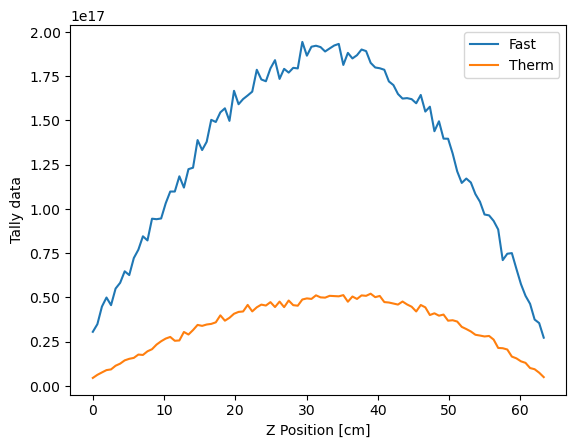

In [36]:
#print(notActiveCoreNRG.indexes)
#print(notCoupledDet.detectors)
spec = notCoupledDet.detectors["compareFuelFlux"]
print(spec.indexes)

# 4,7]
fix = {"energy":1,"ycoord":4,"xcoord":7}
fix2 = {"energy":0,"ycoord":4,"xcoord":7}
plt.figure(1)
spec.plot(fixed=fix,xdim="zmesh",label='Fast')
spec.plot(fixed=fix2,xdim="zmesh",label='Therm')
plt.show()
# notActiveCoreNRG.plot(fixed=fix)

# plt.scatter(np.linspace(0,63.92,100),notActiveCoreNRG,label='a18')
# plt.ylabel('Axial Power (W)')
# plt.xlabel('Height (cm)')
# plt.grid(which='major', color='gray', linestyle='-')
# plt.minorticks_on()
# plt.grid(which='minor', color='lightgray', linestyle='--')
# plt.legend()